In [68]:
import pandas as pd
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
feature_cols=['Pclass','Parch']
X=data[feature_cols]
y=data.Survived

In [70]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [71]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
zip(feature_cols,logreg.coef_[0])

[('Pclass', -0.84439049407381295), ('Parch', 0.34124169973162261)]

In [73]:
y_pred_class=logreg.predict(X_test)

In [74]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.66816143497757852

In [75]:
#Null Accuracy
print y_test.shape
print y_test.value_counts()

print y_test.value_counts().head(1)/y_test.shape

(223L,)
0    128
1     95
Name: Survived, dtype: int64
0    0.573991
Name: Survived, dtype: float64


In [90]:
#Confusion Matrix
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print confusion

[[72 56]
 [32 63]]


In [91]:

TP=confusion[0][0]
TN=confusion[1][1]
FP=confusion[0][1]
FN=confusion[1][0]

In [93]:
Truepositive=X_test[y_test==y_pred_class]
TrueNegative=X_test[y_test!=y_pred_class]
FalsePositive=X_test[y_test<y_pred_class]
FalseNegative=X_test[y_test>y_pred_class]

print "True Positive",len(Truepositive)
print "True Negative",len(TrueNegative)
print "False Positive",len(FalsePositive)
print "False Negative",len(FalseNegative)

True Positive 135
True Negative 88
False Positive 56
False Negative 32


In [79]:
#Sensitivity
print TP/float(TN+FP)

1.5671641791


In [80]:
#Specificity
print TN/float(TP+FN)

0.282051282051


In [81]:
logreg.predict_proba(X_test)[:,1]
ypred_proba=logreg.predict_proba(X_test)[:,1]


In [82]:
print len(ypred_proba)
print len(y_pred_class)

223
223


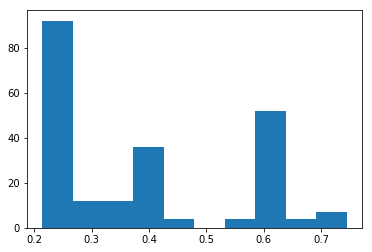

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(ypred_proba)
plt.show()

In [84]:
#increase snsitivity by lowering threshold 
import numpy as np
y_pred_class=np.where(ypred_proba>0.3,1,0)
print len(y_pred_class)

223


In [85]:
print confusion

[[105  23]
 [ 51  44]]


In [86]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print confusion

[[72 56]
 [32 63]]


In [87]:

Tp=confusion[0][0]
Tn=confusion[1][1]
Fp=confusion[1][0]
Fn=confusion[0][1]

print "True +ve",Tp
print "True -ve",Tn
print "False +ve",Fp
print "False -ve",Fn

True +ve 72
True -ve 63
False +ve 32
False -ve 56


In [88]:
#Specificity
Tp/float(Tp+Fn)

0.5625

In [89]:
#Sesitivity
Tn/float(Tn+Fp)


0.66315789473684206